### Xception - Stanford Dogs dataset classification

If you like this script, consider adopting a dog, and never abandon yours

![Never abandon a dog](http://www.the-teen-spirit.dk/films/vanwilder/image.jpg)



I will be performing following steps :
1. Importing the data 
2. Data Argumentation And Visualization 
3. Importing the Xception ( Transfer learning ) 
4. Fully Connected layer 
5. Model Training 
6. Accuracy And Loss Visualization
7. Test the model




# **ABOUT THE DATASET **

The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. It was originally collected for fine-grain image categorization, a challenging problem as certain dog breeds have near identical features or differ in colour and age.


## 1. DATASET EXPLORATION 

In [1]:
!pip install tf_explain
#!pip install split-folders
#!conda install -y gdown

### 1.1 Libraries and data

In [2]:
import os
import pandas as pd


import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as image
import matplotlib.image as mpimg


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import h5py
import pickle
from keras.applications.xception import Xception, preprocess_input




print("Loaded all libraries")

Loaded all libraries


In [3]:
pickle_in = open("labels_dict.pickle","rb")
label_maps_rev = pickle.load(pickle_in)
#label_maps_rev

## 2. MODEL PREPARATION 

### 2.1 Importing the Xception CNN

In [4]:

#my_model.load_weights("/media/marco/DATA/OC_Machine_learning/section_6/DATA/dog_breed_xcept_weights.h5")


In [5]:
model1 = tf.keras.models.load_model("/media/marco/DATA/OC_Machine_learning/section_6/DATA/my_model.h5")
#model1 = tf.keras.models.load_model("/media/marco/DATA/OC_Machine_learning/section_6/DATA/model_89/dog_breed_CNN.h5")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_3 (Dense)              (None, 1032)              2114568   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1032)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               264448    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               30840     
Total params: 23,271,336
Trainable params: 2,409,856
Non-trainable params: 20,861,480
__________________________________

In [6]:
#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 3. PREDICTIONS

In [7]:
def download_and_predict(url, filename):
    # download and save
    os.system("curl -s {} -o {}".format(url, filename))
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((299, 299))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = image.imread(filename)
    img = preprocess_input(img)
    probs = model1.predict(np.expand_dims(img, axis=0))
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", label_maps_rev[idx].split("-")[-1])

72.91% 	 malinois
4.95% 	 kelpie
3.08% 	 German_shepherd
2.91% 	 African_hunting_dog
1.57% 	 Ibizan_hound


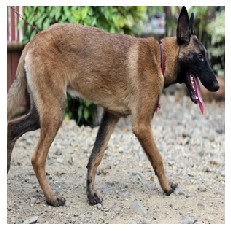

In [8]:
download_and_predict("https://cdn.pixabay.com/photo/2018/08/12/02/52/belgian-mallinois-3599991_1280.jpg",
                     "test_1.jpg")



23.18% 	 Brittany_spaniel
17.93% 	 Blenheim_spaniel
16.05% 	 Welsh_springer_spaniel
6.53% 	 golden_retriever
4.48% 	 Irish_setter


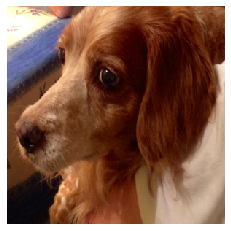

In [9]:
download_and_predict("http://giandonet.altervista.org/Marco/ala.JPG",
                     "test_2.jpg")


In [10]:
def file_predict(filename):
    # download and save
    
    img = Image.open(filename)
    img = img.convert('RGB')
    img = img.resize((299, 299))
    img.save(filename)
    # show image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    # predict
    img = image.imread(filename)
    img = preprocess_input(img)
    probs = model1.predict(np.expand_dims(img, axis=0))
    for idx in probs.argsort()[0][::-1][:5]:
        print("{:.2f}%".format(probs[0][idx]*100), "\t", label_maps_rev[idx].split("-")[-1])

22.72% 	 toy_terrier
10.89% 	 boxer
6.73% 	 Boston_bull
5.59% 	 Chihuahua
4.29% 	 miniature_pinscher


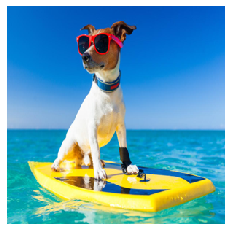

In [12]:
file_predict('surfingdog.jpg')